## Необходимые библиотеки

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
df = pd.read_csv('heart_disease_uci.csv')

## Столбцы датасета
- id - уникальный идентификатор для каждого пациента)
- age - возраст пациента в годах)
- sex - пол, мужской/женский)
- dataset - место исследования
- cp - тип боли в груди (типичная стенокардия, атипичная стенокардия, не стенокардия, бессимптомная)
- trestbps - артериальное давление в покое (артериальное давление в покое (в мм рт. ст. при поступлении в больницу))
- chol - сывороточный холестерин в мг/дл
- fbs - уровень сахара в крови натощак > 120 мг/дл
- restecg - результаты электрокардиографии в покое. Значения: норма, аномалия stt, гипертрофия левого желудочка
- thalach - максимальная достигнутая частота сердечных сокращений
- exang - стенокардия, вызванная нагрузкой (истина/ложь)
- oldpeak - депрессия сегмента ST, вызванная нагрузкой, относительно покоя
- slope - наклон пикового сегмента ST при нагрузке
- ca - количество крупных сосудов (0-3), окрашенных с помощью рентгеноскопии
- thal - дефект пациента (норма; фиксированный дефект; обратимый дефект)
- num - предсказанный атрибут (0=нет заболеваний сердца; 1,2,3,4 = стадии заболеваний сердца)

In [510]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [511]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [512]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [513]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 748
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        299 non-null    int64  
 1   age       299 non-null    int64  
 2   sex       299 non-null    object 
 3   dataset   299 non-null    object 
 4   cp        299 non-null    object 
 5   trestbps  299 non-null    float64
 6   chol      299 non-null    float64
 7   fbs       299 non-null    object 
 8   restecg   299 non-null    object 
 9   thalch    299 non-null    float64
 10  exang     299 non-null    object 
 11  oldpeak   299 non-null    float64
 12  slope     299 non-null    object 
 13  ca        299 non-null    float64
 14  thal      299 non-null    object 
 15  num       299 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 39.7+ KB


## Корреляционный анализ

In [515]:
df.corr(numeric_only = True)

,id,age,trestbps,chol,thalch,oldpeak,ca,num
id,1.000000,0.001379,-0.021051,-0.138639,-0.159716,-0.091294,0.020103,0.031397
age,0.001379,1.000000,0.286149,0.199258,-0.384176,0.195929,0.362764,0.221787
trestbps,-0.021051,0.286149,1.000000,0.134240,-0.053320,0.191144,0.096641,0.159272
chol,-0.138639,0.199258,0.134240,1.000000,0.014894,0.033964,0.121907,0.065081
thalch,-0.159716,-0.384176,-0.053320,0.014894,1.000000,-0.348089,-0.256831,-0.416480
oldpeak,-0.091294,0.195929,0.191144,0.033964,-0.348089,1.000000,0.291958,0.501325
ca,0.020103,0.362764,0.096641,0.121907,-0.256831,0.291958,1.000000,0.520058
num,0.031397,0.221787,0.159272,0.065081,-0.416480,0.501325,0.520058,1.000000


### Корреляция холестерина с другими параметрами

In [516]:
df.corrwith(df['chol'], numeric_only = True).sort_values(ascending=False)

chol        1.000000
age         0.199258
trestbps    0.134240
ca          0.121907
num         0.065081
oldpeak     0.033964
thalch      0.014894
id         -0.138639
dtype: float64

Вывод: наибольшая корреляция у холестерина наблюдается с возрастом

## Описательная статистка

In [517]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,153.872910,54.521739,131.715719,246.785953,149.327759,1.058528,0.672241,0.946488
std,95.896287,9.030264,17.747751,52.532582,23.121062,1.162769,0.937438,1.230409
min,1.000000,29.000000,94.000000,100.000000,71.000000,0.000000,0.000000,0.000000
25%,75.500000,48.000000,120.000000,211.000000,132.500000,0.000000,0.000000,0.000000
50%,151.000000,56.000000,130.000000,242.000000,152.000000,0.800000,0.000000,0.000000
75%,227.500000,61.000000,140.000000,275.500000,165.500000,1.600000,1.000000,2.000000
max,749.000000,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,4.000000


### Размах и интерквартильный размах

#### Возраст

In [518]:
razmah_age = df['age'].max() - df['age'].min()
print(f'Размах равен: {razmah_age}')

IQR_age = df['age'].quantile(0.75) - df['age'].quantile(0.25)
print(f'Интерквартильный размах равен: {IQR_age}')

Размах равен: 48
Интерквартильный размах равен: 13.0


#### Давление в покое

In [519]:
razmah_davlen = df['trestbps'].max() - df['trestbps'].min()
print(f'Размах равен: {razmah_davlen}')

IQR_davlen = df['trestbps'].quantile(0.75) - df['trestbps'].quantile(0.25)
print(f'Интерквартильный размах равен: {IQR_davlen}')

Размах равен: 106.0
Интерквартильный размах равен: 20.0


#### Холестерин

In [520]:
razmah_chol = df['chol'].max() - df['chol'].min() 
print(f'Размах равен: {razmah_chol}')

IQR_chol = df['chol'].quantile(0.75) - df['chol'].quantile(0.25)
print(f'Интерквартильный размах равен: {IQR_chol}')

Размах равен: 464.0
Интерквартильный размах равен: 64.5


#### Максимальная частота сердечных сокращений

In [521]:
razmah_sokr = df['thalch'].max() - df['thalch'].min()
print(f'Размах для максимальной частоты сердечных сокращений равен: {razmah_sokr}')

IQR_sokr = df['thalch'].quantile(0.75) - df['thalch'].quantile(0.25)
print(f'Интерквартильный размах равен: {IQR_sokr}')

Размах для максимальной частоты сердечных сокращений равен: 131.0
Интерквартильный размах равен: 33.0


#### Депрессия сегмента ST, вызванная нагрузкой, относительно покоя

In [522]:
razmah_depr_st = df['oldpeak'].max() - df['oldpeak'].min() 
print(f'Размах равен: {razmah_depr_st}')

IQR_depr_st = df['oldpeak'].quantile(0.75) - df['oldpeak'].quantile(0.25)
print(f'Интерквартильный размах равен: {IQR_depr_st}')

Размах равен: 6.2
Интерквартильный размах равен: 1.6


### Прочие характеристики описательной статистики

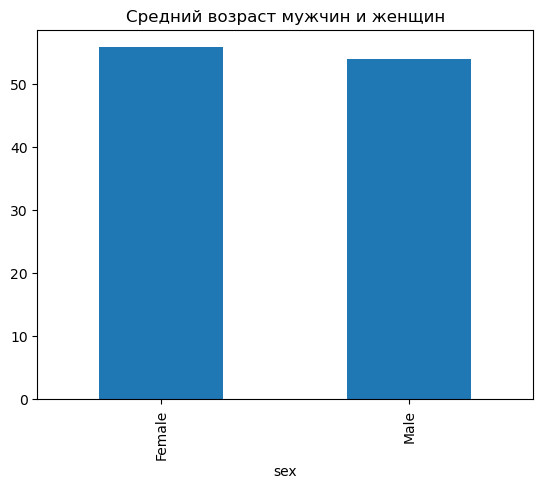

In [523]:
sexes_avg_age = df.groupby('sex')['age'].mean()
sexes_avg_age.plot(kind = 'bar')

plt.title('Средний возраст мужчин и женщин')
plt.show()

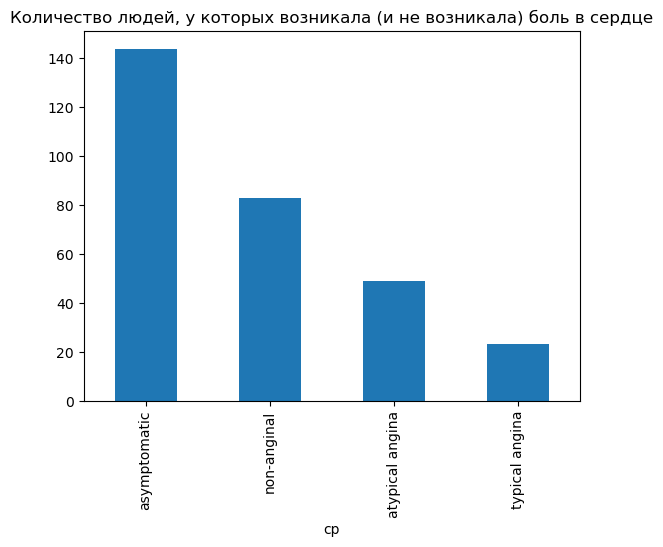

In [524]:
cp_num = df['cp'].value_counts()
cp_num.plot(kind = 'bar')

plt.title('Количество людей, у которых возникала (и не возникала) боль в сердце')
plt.show()

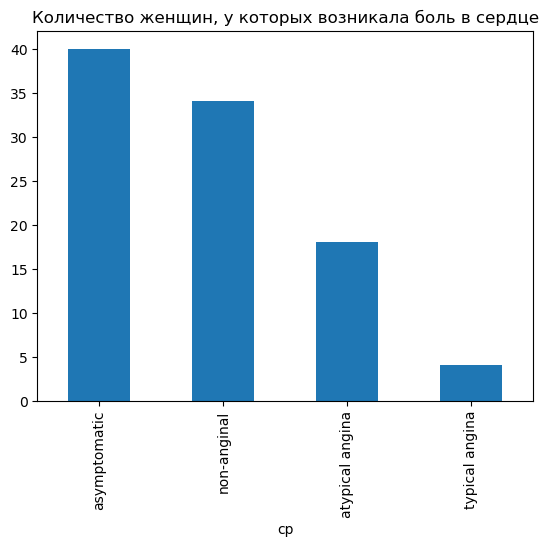

In [525]:
cp_num_fm = df[df['sex'] == 'Female']['cp'].value_counts()
cp_num_fm.plot(kind = 'bar')

plt.title('Количество женщин, у которых возникала боль в сердце')
plt.show()

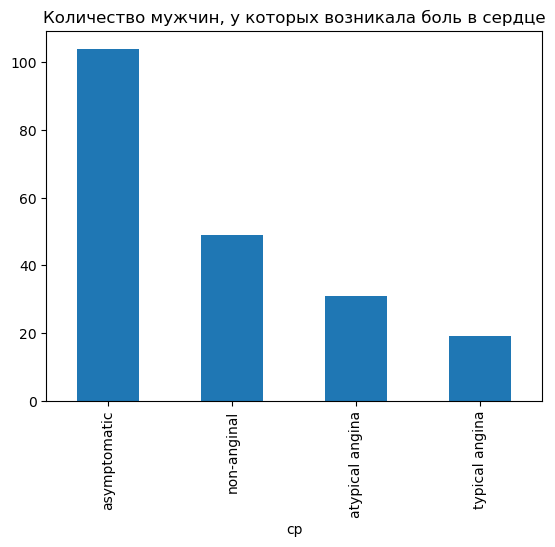

In [526]:
cp_num_m = df[df['sex'] == 'Male']['cp'].value_counts()
cp_num_m.plot(kind = 'bar')

plt.title('Количество мужчин, у которых возникала боль в сердце')
plt.show()

## Когортный анализ и проверка распределений по когортам

In [4]:
df['Cohort'] = pd.cut(df['age'], bins=[28, 40, 50, 60, 70, 77], labels=['29 - 40', '41 - 50', '51 - 60', '61 - 70', '71 - 77'])

# Хотя наименьший возраст - это 29, я написал в bins 28, так как при указании 29 в соответствующей строке вместо лейбла когорты будет "NaN"

In [5]:
cohort_groups_chol_mean = df.groupby(['Cohort'])['chol'].mean()

C:\Users\nurbo\AppData\Local\Temp\ipykernel_13128\3931590008.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cohort_groups_chol_mean = df.groupby(['Cohort'])['chol'].mean()


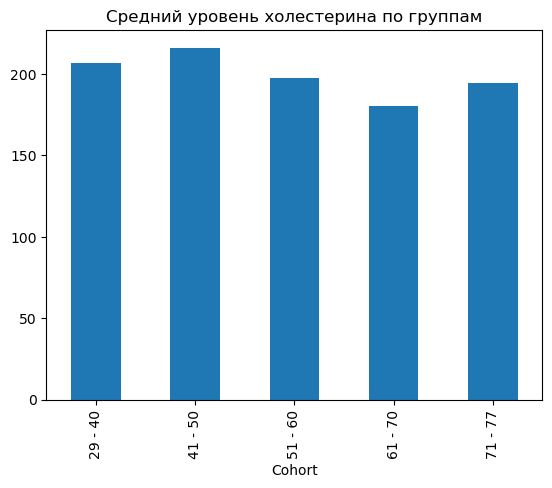

In [7]:
cohort_groups_chol_mean.plot(kind = 'bar')

plt.title('Средний уровень холестерина по группам')
plt.show()

### Визуальная проверка распределений

#### Боксплоты

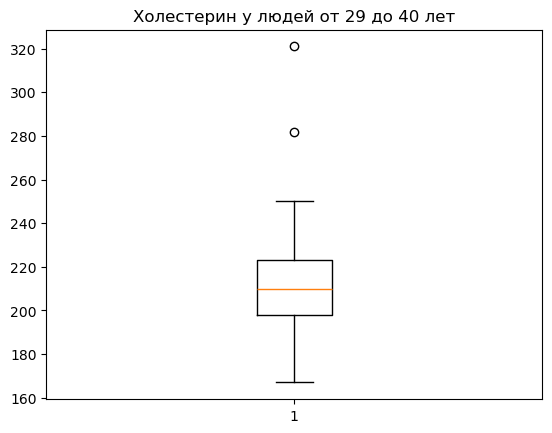

In [555]:
chol_29_40 = df[(df['Cohort'] == '29 - 40')]['chol']

plt.boxplot(chol_29_40)
plt.title('Холестерин у людей от 29 до 40 лет')
plt.show()

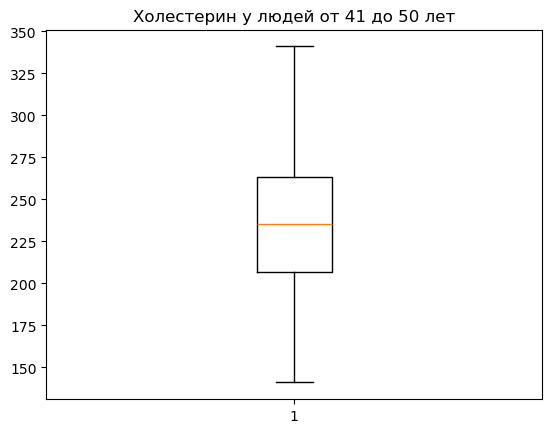

In [556]:
chol_41_50 = df[(df['Cohort'] == '41 - 50')]['chol']

plt.boxplot(chol_41_50)
plt.title('Холестерин у людей от 41 до 50 лет')
plt.show()

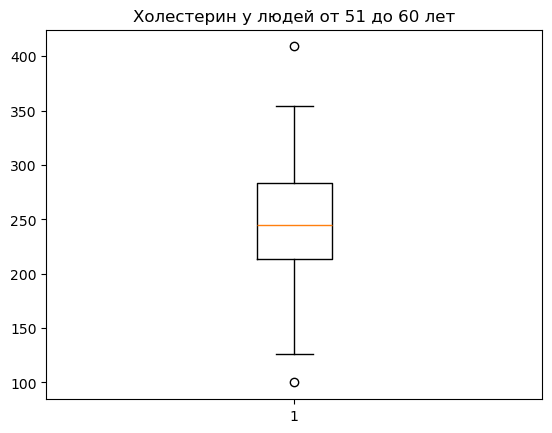

In [557]:
chol_51_60 = df[(df['Cohort'] == '51 - 60')]['chol']

plt.boxplot(chol_51_60)
plt.title('Холестерин у людей от 51 до 60 лет')
plt.show()

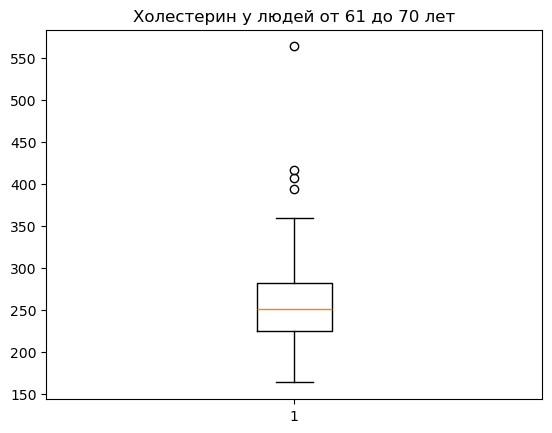

In [558]:
chol_61_70 = df[(df['Cohort'] == '61 - 70')]['chol']

plt.boxplot(chol_61_70)
plt.title('Холестерин у людей от 61 до 70 лет')
plt.show()

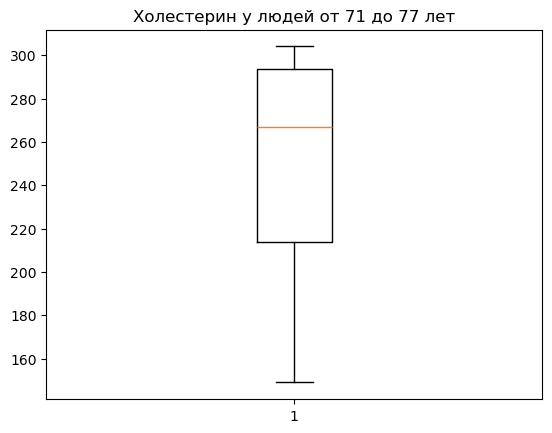

In [559]:
chol_71_77 = df[(df['Cohort'] == '71 - 77')]['chol']

plt.boxplot(chol_71_77)
plt.title('Холестерин у людей от 71 до 77 лет')
plt.show()

#### Гистограммы

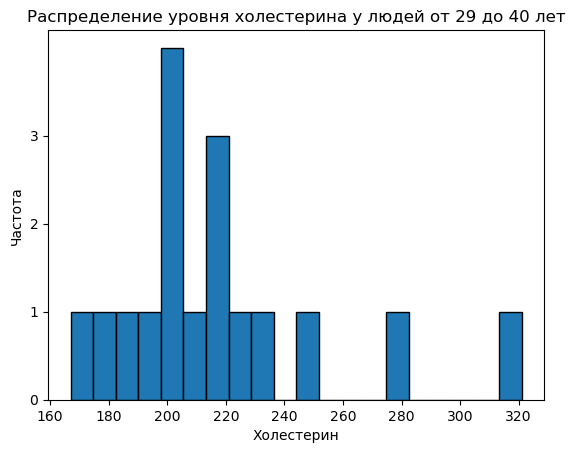

In [560]:
plt.hist(chol_29_40, bins=20, edgecolor='black')
plt.title('Распределение уровня холестерина у людей от 29 до 40 лет')
plt.yticks([0, 1, 2, 3])

plt.xlabel('Холестерин')
plt.ylabel('Частота')
plt.show()

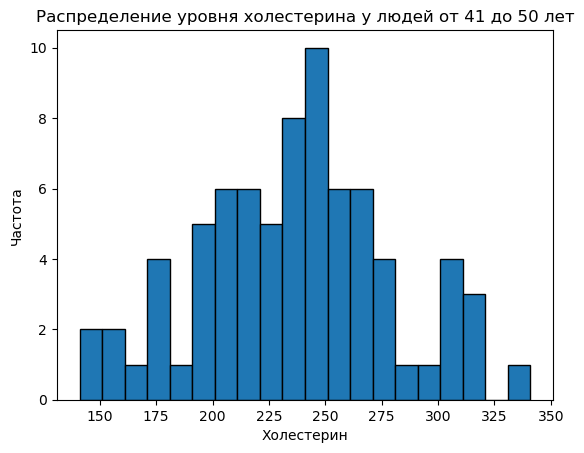

In [561]:
plt.hist(chol_41_50, bins=20, edgecolor='black')
plt.title('Распределение уровня холестерина у людей от 41 до 50 лет')

plt.xlabel('Холестерин')
plt.ylabel('Частота')
plt.show()

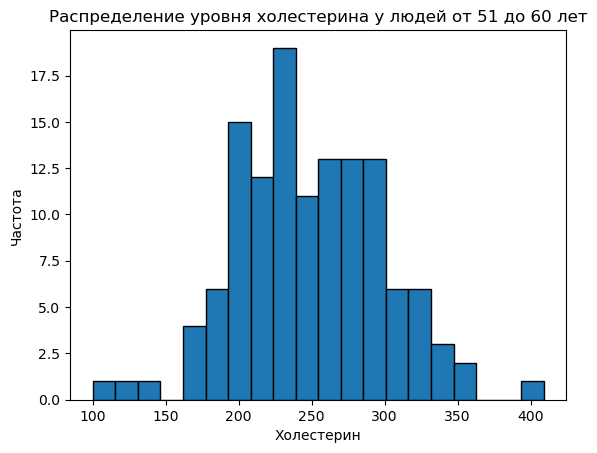

In [562]:
plt.hist(chol_51_60, bins=20, edgecolor='black')
plt.title('Распределение уровня холестерина у людей от 51 до 60 лет')

plt.xlabel('Холестерин')
plt.ylabel('Частота')
plt.show()

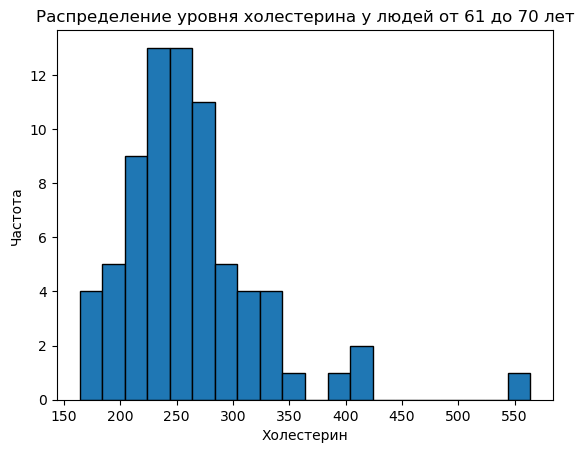

In [563]:
plt.hist(chol_61_70, bins=20, edgecolor='black')
plt.title('Распределение уровня холестерина у людей от 61 до 70 лет')

plt.xlabel('Холестерин')
plt.ylabel('Частота')
plt.show()

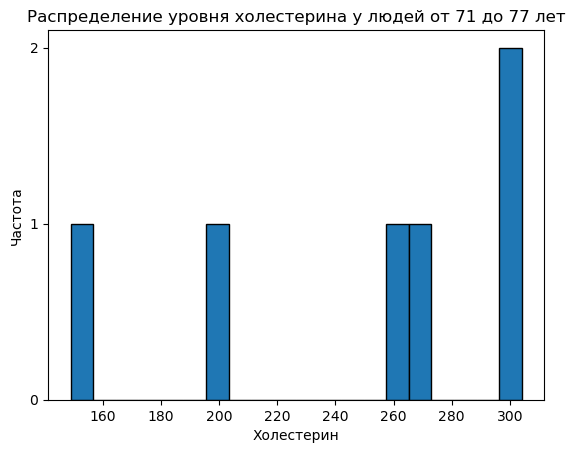

In [564]:
plt.hist(chol_71_77, bins=20, edgecolor='black')
plt.title('Распределение уровня холестерина у людей от 71 до 77 лет')
plt.yticks([0, 1, 2])

plt.xlabel('Холестерин')
plt.ylabel('Частота')
plt.show()

#### QQ-plots

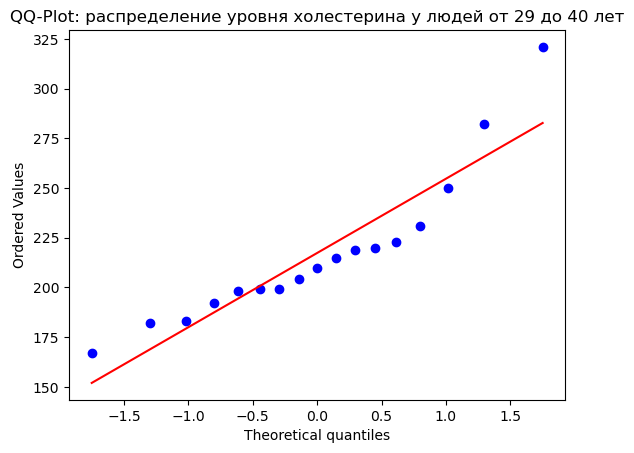

In [565]:
stats.probplot(chol_29_40, dist="norm", plot=plt)
plt.title('QQ-Plot: распределение уровня холестерина у людей от 29 до 40 лет')
plt.show()

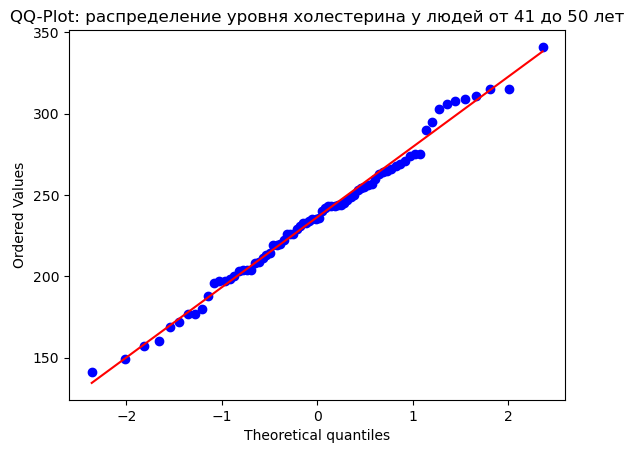

In [566]:
stats.probplot(chol_41_50, dist="norm", plot=plt)
plt.title('QQ-Plot: распределение уровня холестерина у людей от 41 до 50 лет')
plt.show()

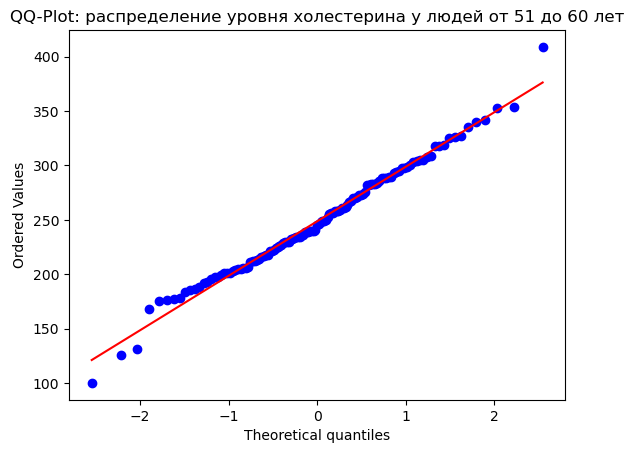

In [567]:
stats.probplot(chol_51_60, dist="norm", plot=plt)
plt.title('QQ-Plot: распределение уровня холестерина у людей от 51 до 60 лет')
plt.show()

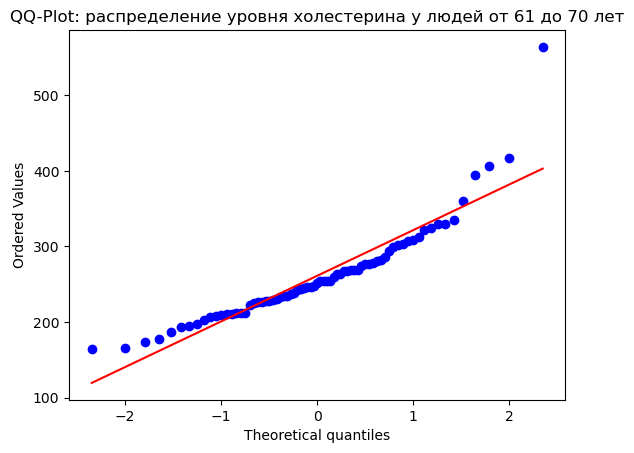

In [568]:
stats.probplot(chol_61_70, dist="norm", plot=plt)
plt.title('QQ-Plot: распределение уровня холестерина у людей от 61 до 70 лет')
plt.show()

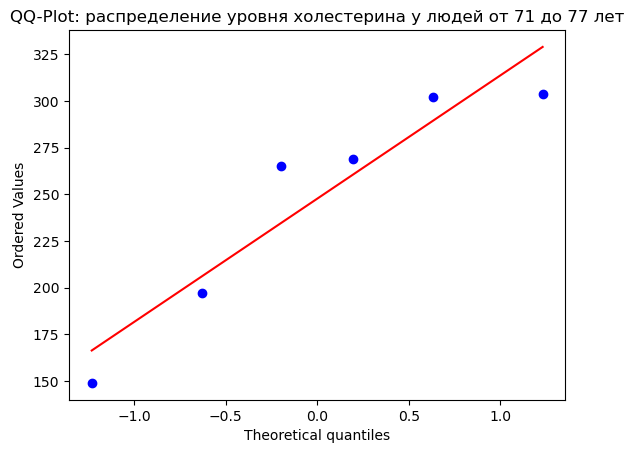

In [569]:
stats.probplot(chol_71_77, dist="norm", plot=plt)
plt.title('QQ-Plot: распределение уровня холестерина у людей от 71 до 77 лет')
plt.show()

### Проверка нормальности распределения посредством теста Шапиро

In [570]:
_, p = stats.shapiro(chol_29_40)

if p > 0.05:
    print('Распределение нормальное:', p)
else:
    print('К сожалению, распределение не нормальное:', p)

К сожалению, распределение не нормальное: 0.024005956336635634


In [571]:
_, p = stats.shapiro(chol_41_50)

if p > 0.05:
    print('Распределение нормальное:', p)
else:
    print('К сожалению, распределение не нормальное:', p)

Распределение нормальное: 0.8119633650367601


In [572]:
_, p = stats.shapiro(chol_51_60)

if p > 0.05:
    print('Распределение нормальное:', p)
else:
    print('К сожалению, распределение не нормальное:', p)

Распределение нормальное: 0.600401751152708


In [573]:
_, p = stats.shapiro(chol_61_70)

if p > 0.05:
    print('Распределение нормальное:', p)
else:
    print('К сожалению, распределение не нормальное:', p)

К сожалению, распределение не нормальное: 2.2928856476011535e-06


In [574]:
_, p = stats.shapiro(chol_71_77)

if p > 0.05:
    print('Распределение нормальное:', p)
else:
    print('К сожалению, распределение не нормальное:', p)

Распределение нормальное: 0.24284082763694936


## Статистический тест

### Гипотеза

Средний холестерин у людей возрастом от 41-50 и от 51-60 различается

### Проверка гипотезы

In [575]:
stats.ttest_ind(chol_41_50, chol_51_60)

TtestResult(statistic=-1.8055223252410197, pvalue=0.07248926906810892, df=201.0)

### Результат:

In [576]:
_, p = stats.ttest_ind(chol_41_50, chol_51_60)

if p > 0.05:
    print(f'Вывод: средний холестерин одинаков в обоих группах, так как {p} больше 0.05')
else:
    print(f'Вывод: средний холестерин разный в двух группах, так как {p} меньше 0.05')

Вывод: средний холестерин одинаков в обоих группах, так как 0.07248926906810892 больше 0.05
